In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs

import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [6]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://www.amazon.com/")

In [7]:
# a = driver.find_element_by_css_selector('#twotabsearchtextbox')

# a.click()
# a.send_keys('nature republic')
# a.send_keys(Keys.ENTER)
# time.sleep(1)
# soup = bs(driver.page_source, 'html.parser')
# search = soup.select('span > a.a-link-normal.s-no-outline')
# time.sleep(1)

# n=0
# for i in search:
#     if (n < 8):
#         n= n+1
#         continue
#     elif(n > 10):
#         break
#     driver.get('https://www.amazon.com' + i['href'])
#     time.sleep(0.3)
#     driver.back()
#     time.sleep(0.3)
#     n= n+1

In [8]:
# driver.get("https://www.amazon.com/Republic-Soothing-Moisture-Percent-Cosmetics/dp/B00DTFJA54/ref=sr_1_1?keywords=nature+republic&qid=1663290918&sprefix=nature+re%2Caps%2C300&sr=8-1")
driver.get("https://www.amazon.com/Republic-Soothing-Moisture-Percent-Cosmetics/product-reviews/B00DTFJA54/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
time.sleep(2)
text_list=[]
star_list=[]

n=0
while n<90:
    try:
        driver.refresh()
        time.sleep(1)
        soup = bs(driver.page_source, 'html.parser')
        text = soup.select('div.a-row.a-spacing-small.review-data > span')
        star = soup.select('div.a-section.review.aok-relative > div>div>div>a>i>span.a-icon-alt')
        if len(star) == 0:
            star = soup.select('div>div>i>span.a-icon-alt')
        
        for i in text:
            text_list.append(i.text)
            
        for i in star:
            b = float(i.text[0:3])
            star_list.append(b)
            
        a = driver.find_element_by_css_selector('li.a-last > a')
        a.click()
        time.sleep(1)
        n=n+1
    except:
        break
    
len(text_list), len(star_list)

(900, 900)

In [31]:
import pickle

# 저장하기
# with open('amazon_review_text_list.pkl', "wb") as f:
#     pickle.dump(text_list, f)

# 불러오기
# with open('파일 이름.pkl', "rb") as f:
#     피클 데이터의 변수이름 = pickle.load(f)

In [9]:
n=0
rns=[]

while len(text_list) > n:
    rns.append([text_list[n],star_list[n]])
    n = n+1


In [10]:
rns_high =[]
rns_low = []
for text,star in rns:
    if star > 3.9:
        rns_high.append(text)
    elif star < 2.1:
        rns_low.append(text)

len(rns_high), len(rns_low)


(765, 87)

In [11]:
import nltk
from nltk import pos_tag

from collections import Counter

In [12]:
def extract_tag_english(string):
    
    split_string = nltk.word_tokenize(string)
    result = nltk.pos_tag(split_string)
    
    result_word=[]
    for word, tag in result:
        if tag in['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' 'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']:
            if word.lower() not in nltk.corpus.stopwords.words('english'):
                if word.lower() not in ['’','%','\'ve','\'m']:
                    result_word.append(word)
    return result_word

def extract_tag_english2(string):
    
    split_string = nltk.word_tokenize(string)
    result = nltk.pos_tag(split_string)
    
    result_word=[]
    for word, tag in result:
        if tag in['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' 'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']:
            if word.lower() not in nltk.corpus.stopwords.words('english'):
                if word.lower() not in ['’','%','\'ve','\'m','use','face','skin','gel','product','using','used','aloe','put','get','vera'
                                        ,'feel', 'feels','made','bought', 'started','got', 'know', 'list', 'apply',]:
                    result_word.append(word)
    return result_word

In [13]:
all_list = []
high_list= []
low_list = []

for i in text_list:
    all_list = all_list + extract_tag_english(i)
for i in rns_high:
    high_list = high_list + extract_tag_english2(i)
for i in rns_low:
    low_list = low_list + extract_tag_english2(i)


In [89]:
count_all = Counter(all_list)
count_high = Counter(high_list)
count_low = Counter(low_list)

In [90]:
count_low2 = count_low.most_common(30)
count_low ={}
for i,j in count_low2:
    count_low[f'{i}'] = j

count_all2 = count_all.most_common(30)
count_all ={}
for i,j in count_all2:
    count_all[f'{i}'] = j

count_high2 = count_high.most_common(30)
count_high ={}
for i,j in count_high2:
    count_high[f'{i}'] = j

In [91]:
from wordcloud import WordCloud
from collections import Counter # 워드를 카운팅해주는 라이브러리
import matplotlib.pyplot as plt # 데이터를 시각화 해주는 라이브러리

from PIL import Image
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

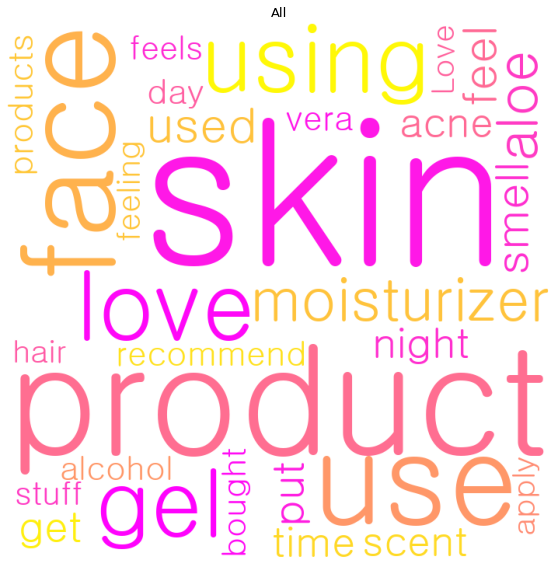

In [92]:
wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 random_state=1).generate_from_frequencies(count_all)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("All", size = 13)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

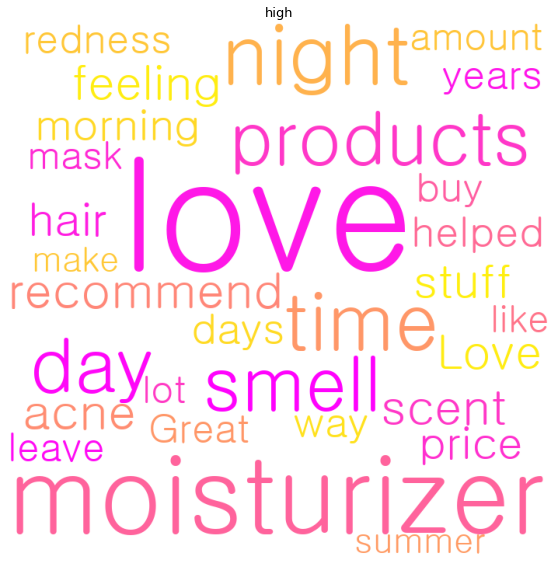

In [93]:
wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 random_state=1).generate_from_frequencies(count_high)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("high", size = 13)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

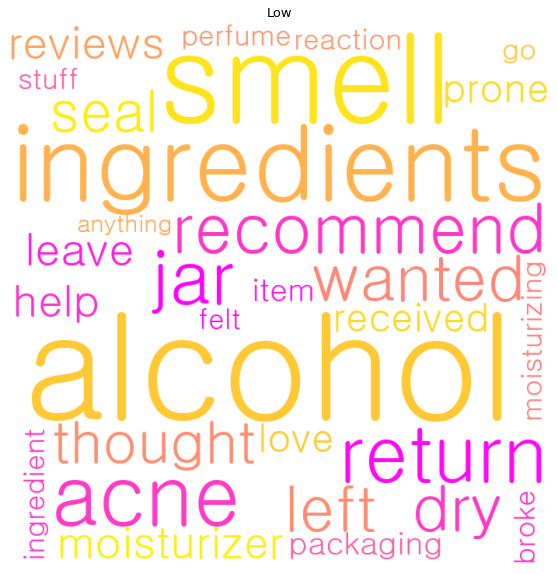

In [94]:
wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 random_state=1).generate_from_frequencies(count_low)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Low", size = 13)
plt.show 